## Spaceship Titanic 🚀
This notebook is an exercise in exploratory data analysis and machine learning. It uses the [Spaceship Titanic](https://www.kaggle.com/c/spaceship-titanic) data set, which contains information about the passengers's fate on the futuristic spaceship Titanic.

### Introduction
First, we will import the necessary libraries, load the data, and survey basic information about the data.


In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

train = train_set.copy()
test = test_set.copy()
train_set.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


#### 1. Check the dataset details, missing values, datatypes and other information.
It will allow us to further choose the examination methods determine exploration strategy.



<AxesSubplot:xlabel='Transported', ylabel='count'>

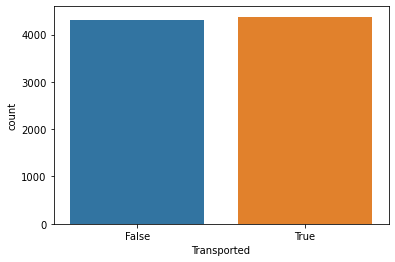

In [147]:
# check the 'Transported' column data distribution
sns.countplot(x='Transported', data=train_set)

In [148]:
train_set.dtypes ### check the data type of each column

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

We can see that the features are of type `object` and `int64` -  the first ones are categorical types, the latter is a numerical type.
The dataset description is available in the [Kaggle dataset description](https://www.kaggle.com/c/spaceship-titanic/data).
The columns are as follows:
- **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

- **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

- **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

- **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

- **Destination** - The planet the passenger will be debarking to.

- **Age** - The age of the passenger.

- **VIP** - Whether the passenger has paid for special VIP service during the voyage.

- **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

- **Name** - The first and last names of the passenger.

- **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [149]:
train_set.isnull().sum() ### check the missing value of each column

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [150]:
train_set.isnull().sum()/train_set.shape[0]*100 ### check the percentage of missing value of each column

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [151]:
train_set.describe() ### check the statistical summary of each column (from the numerical columns)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


#### 2. Check the data distribution, correlation and mutual information of the features.

In [152]:
### get the names of numerical and categorical columns
numerical_cols, categorical_cols = train_set.dtypes[train_set.dtypes != 'object'].index, train_set.dtypes[train_set.dtypes == 'object'].index

In [153]:
### get the correlation matrix of numerical columns
corr_matrix = train_set.corr()
corr_matrix.style.background_gradient(cmap=sns.diverging_palette(230, 30, l=65, as_cmap=True))

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


Spa + VRDeck, FoodCourt + Shopping Mall, RoomService

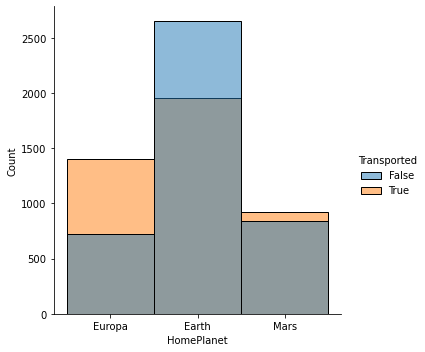

In [154]:
sns.displot(data=train_set,x='HomePlanet', hue='Transported') ### check the distribution of home planet and transported

<AxesSubplot:xlabel='Transported', ylabel='Age'>

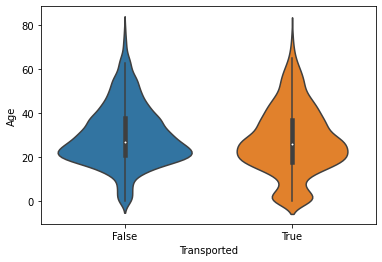

In [155]:
### check age distribution with division by transported column
sns.violinplot(x='Transported', y='Age', data=train_set)


<AxesSubplot:xlabel='AgeGroup', ylabel='Count'>

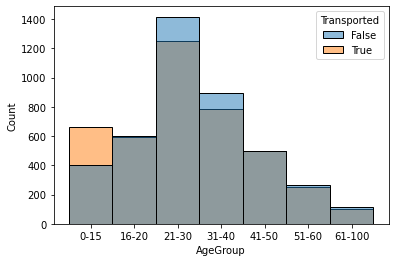

In [156]:
### group people into bins and check the distribution of age with transported column
bins = [0, 15, 20, 30, 40, 50, 60, 100]
group_names = ['0-15', '16-20', '21-30', '31-40', '41-50', '51-60', '61-100']
train_set['AgeGroup'] = pd.cut(train_set['Age'], bins, labels=group_names)
sns.histplot(hue='Transported', x='AgeGroup', data=train_set)


<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

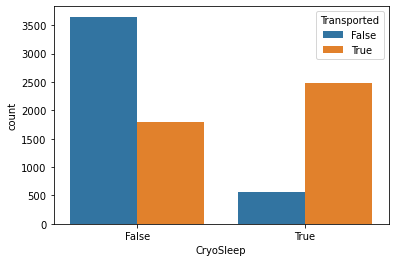

In [157]:
sns.countplot(data=train_set, x='CryoSleep', hue='Transported') ### check the distribution of survived and transported

In [158]:
### test the cabin split hypothesis
hypo = train_set[['Cabin','Transported']].copy()
hypo[['Deck', 'Num', 'Side']] = hypo['Cabin'].str.split('/', expand=True)

<AxesSubplot:xlabel='Deck', ylabel='count'>

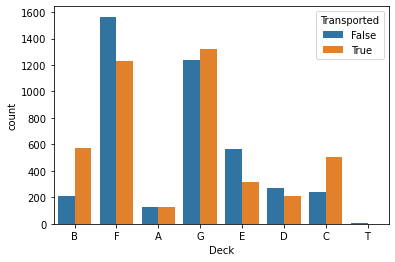

In [159]:
sns.countplot(x='Deck', data=hypo, hue='Transported')

<AxesSubplot:xlabel='Side', ylabel='count'>

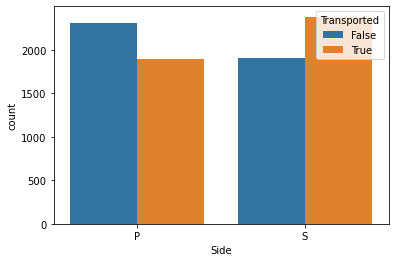

In [160]:
sns.countplot(x='Side', data=hypo, hue='Transported')

<AxesSubplot:xlabel='VIP', ylabel='count'>

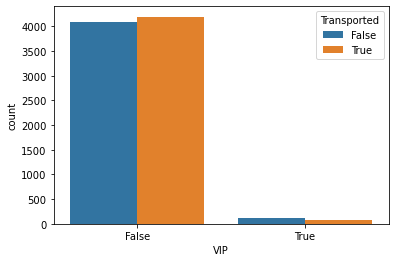

In [161]:
sns.countplot(data=train_set,x='VIP', hue='Transported')

In [162]:
ammenities = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'] ### room service seem to be distinguishable from other amenities, RS, FC
# we can sum 3 vars
# #FC Spa VR somewhat correlated

In [163]:
# create pipeline with column transformer and model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.compose import ColumnTransformer

from sklearn.base import BaseEstimator, TransformerMixin

X_train, X_test, y_train, y_test = train_test_split(train, train['Transported'], test_size=0.2, random_state=42)

class spaceship_titanic_transformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        df = X.copy()
        df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)
        bins = [0, 15, 20, 30, 40, 50, 60, 100]
        group_names = ['0-15', '16-20', '21-30', '31-40', '41-50', '51-60', '61-100']
        df['AgeGroup'] = pd.cut(df['Age'], bins, labels=group_names)
        df['SpaVR'] = df['Spa']+df['VRDeck']
        df['FoodMall'] = df['FoodCourt']+df['ShoppingMall']
        df.drop(['PassengerId', 'Name', 'Cabin', 'Spa', 'VRDeck', 'FoodCourt', 'ShoppingMall'] , axis=1, inplace=True)   
        df['Deck'] = df['Deck'].fillna(df['Deck'].mode()[0])
        labenc = LabelEncoder()
        df['Deck'] = labenc.fit_transform(df['Deck'])
        return df
        
#numerical transformer
numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())])

#categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#preprocessing pipeline
column_tranformer = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['SpaVR', 'FoodMall', 'RoomService']),
        ('cat', categorical_transformer, ['Deck', 'Num', 'Side', 'AgeGroup', 'VIP', 'CryoSleep', 'HomePlanet'])
    ])

# accelerate xgboost by using GPU
ml_pipeline = Pipeline(steps=[('preprocessor', spaceship_titanic_transformer()),
    ('column_transformer', column_tranformer),
    ('classifier', XGBClassifier(verbosity=2))])

# search for hyperparameters by grid search, accelerate xgboost by using GPU
param_grid = [
    {'classifier__n_estimators': [100, 200, 500, 1000],
     'classifier__max_depth': [2, 5, 6, 9, 10],
     'classifier__learning_rate': [0.1, 0.4, 0.5, 0.8, 1.0],
     'classifier__min_child_weight': [1, 3, 5, 7, 9],
     'classifier__objective': ['binary:logistic'],
     'classifier__tree_method': ['gpu_hist'],
     'classifier__verbosity': [2]},
     }]

grid_search = GridSearchCV(ml_pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
# fit on GPU
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


KeyboardInterrupt: 

In [ ]:
# print the best parameters and the best score
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

In [ ]:
# save predictions
predictions = grid_search.predict(test)
pd.DataFrame({"PassengerId": test["PassengerId"], "Transported": predictions.astype(bool)}).to_csv('submission.csv', index=False)
